In [1]:
#Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Loading the dataset “featured_telcom_data.xlsx”:

In [4]:
featured_data=pd.read_csv("featured_telcom_data.csv")

In [6]:
featured_data

,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
0,0,0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,...,3563542.000,137762.0000,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06
1,1,1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,...,629046.000,308339.0000,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07
2,2,2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,...,2690151.000,672973.0000,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06
3,3,3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,...,1439754.000,631229.0000,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07
4,4,4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,...,1936496.000,173853.0000,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,...,57639.000,633237.0000,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07
149997,149997,149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,...,1954414.000,167304.0000,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06
149998,149998,149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,...,1525734.000,532543.0000,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07
149999,149999,149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,...,2228270.000,622644.0000,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06


In [8]:
featured_data.head()

,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
0,0,0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,...,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0
1,1,1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,...,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0
2,2,2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,...,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0
3,3,3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,...,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0
4,4,4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,...,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0


In [10]:
featured_data.tail()

,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
149996,149996,149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,...,57639.000,633237.0000,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07
149997,149997,149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,...,1954414.000,167304.0000,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06
149998,149998,149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,...,1525734.000,532543.0000,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07
149999,149999,149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,...,2228270.000,622644.0000,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06
150000,150000,150000,7.349880e+18,Unknown,499.0,Unknown,500.0,86399.0,2.082015e+14,3.366371e+10,...,1791728.868,467373.4419,11634072.5,11009410.13,11626851.72,11001754.82,422044702.6,8.288398e+06,421100544.2,8.264799e+06


In [12]:
featured_data.shape

(150001, 72)

# Calculate average TCP retransmission, RTT, and throughput:

In [15]:
featured_data['Avg TCP Retrans. Vol (Bytes)'] = (featured_data['TCP DL Retrans. Vol (Bytes)'] +
                                      featured_data['TCP UL Retrans. Vol (Bytes)']) / 2

In [17]:
featured_data['Avg TCP Retrans. Vol (Bytes)']

0         294839.75
1         294839.75
2         294839.75
3         294839.75
4         294839.75
            ...    
149996    294839.75
149997    294839.75
149998    294839.75
149999    294839.75
150000    294839.75
Name: Avg TCP Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [19]:
featured_data['Avg RTT (ms)'] = (featured_data['Avg RTT DL (ms)'] + featured_data['Avg RTT UL (ms)']) / 2

In [21]:
featured_data['Avg RTT (ms)']

0         23.5
1         35.0
2         25.0
3         25.0
4         25.0
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000    25.0
Name: Avg RTT (ms), Length: 150001, dtype: float64

In [23]:
featured_data['Avg Throughput (kbps)'] = (featured_data['Avg Bearer TP DL (kbps)'] + featured_data['Avg Bearer TP UL (kbps)']) / 2

In [25]:
featured_data['Avg Throughput (kbps)']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000    63.0
Name: Avg Throughput (kbps), Length: 150001, dtype: float64

# ◆ Select relevant features for clustering:

In [28]:
features = featured_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]

# Standardize the data:

In [31]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering for Engagement:

In [34]:
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_engagement.fit_predict(features_scaled)
featured_data['Engagement Cluster'] = engagement_clusters

# Perform k-means clustering for Experience:

In [37]:
kmeans_experience = KMeans(n_clusters=3, random_state=42)
experience_clusters = kmeans_experience.fit_predict(features_scaled)
featured_data['Experience Cluster'] = experience_clusters

# Calculate the Euclidean distance for Engagement score:

In [40]:
less_engaged_centroid = kmeans_engagement.cluster_centers_[0]
featured_data['Engagement Score'] = cdist(features_scaled, [less_engaged_centroid], metric='euclidean')

In [42]:
featured_data['Engagement Score']

0         0.195454
1         0.174413
2         0.193815
3         0.191628
4         0.193815
            ...   
149996    0.211362
149997    0.216120
149998    0.192628
149999    0.200868
150000    0.190495
Name: Engagement Score, Length: 150001, dtype: float64

# Calculate the Euclidean distance for Experience score:

In [45]:
worst_experience_centroid = kmeans_experience.cluster_centers_[2]
featured_data['Experience Score'] = cdist(features_scaled, [worst_experience_centroid], metric='euclidean')

In [47]:
featured_data['Experience Score']

0         2.318006
1         2.317472
2         2.319707
3         2.316994
4         2.319707
            ...   
149996    2.317487
149997    2.319277
149998    2.316996
149999    2.318270
150000    2.315582
Name: Experience Score, Length: 150001, dtype: float64

# Calculate the satisfaction score as the average of Engagement & Experience scores:

In [50]:
featured_data['Satisfaction Score'] = (featured_data['Engagement Score'] + featured_data['Experience Score']) / 2

In [52]:
featured_data['Satisfaction Score']

0         1.256730
1         1.245942
2         1.256761
3         1.254311
4         1.256761
            ...   
149996    1.264425
149997    1.267698
149998    1.254812
149999    1.259569
150000    1.253039
Name: Satisfaction Score, Length: 150001, dtype: float64

# Report the top 10 satisfied Customers:

In [55]:
top_10_satisfied_customers = featured_data.nsmallest(10, 'Satisfaction Score')

# ◆ Show the top 10 satisfied customers:

In [58]:
print(top_10_satisfied_customers[['Engagement Score', 'Experience Score', 'Satisfaction Score']])

        Engagement Score  Experience Score  Satisfaction Score
3803            0.645366          1.515799            1.080582
117910          0.619941          1.541225            1.080583
137193          1.447365          0.713802            1.080583
77992           0.730120          1.431047            1.080583
76783           0.769380          1.391790            1.080585
24001           0.430901          1.730271            1.080586
1172            0.695187          1.465986            1.080587
2379            0.428509          1.732667            1.080588
77526           0.654626          1.506552            1.080589
112497          0.626012          1.535168            1.080590


# ◆ Preparation of Data:

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# • Prepare the features and target:

In [64]:
X = np.asanyarray(featured_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])
y = np.asanyarray(featured_data['Satisfaction Score'])

In [66]:
X.shape

(150001, 3)

In [68]:
y.shape

(150001,)

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ◆ Initialize and train the linear_regression_model:

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [75]:
r2_score = r2_score(y_test, y_pred)

In [77]:
r2_score

0.9268559732925539

In [79]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [81]:
mae

0.24507451149179582

In [83]:
mse

0.1347998840375571

In [85]:
rmse

0.36715103709176294

In [87]:
import pickle 
pickle.dump(model,open('regression_model.pkl','wb'))
print(type(model)) 

<class 'sklearn.linear_model._base.LinearRegression'>


# Extract the Engagement and Experience scores:

In [90]:
scores = featured_data[['Engagement Score', 'Experience Score']]

In [92]:
kmeans = KMeans(n_clusters=2, random_state=42)
featured_data['Score Cluster'] = kmeans.fit_predict(scores)

In [94]:
centroids = kmeans.cluster_centers_

In [96]:
centroids

array([[ 0.68909856,  1.95593978],
       [23.70481548, 23.53889333]])

# Visualization of the clusters:

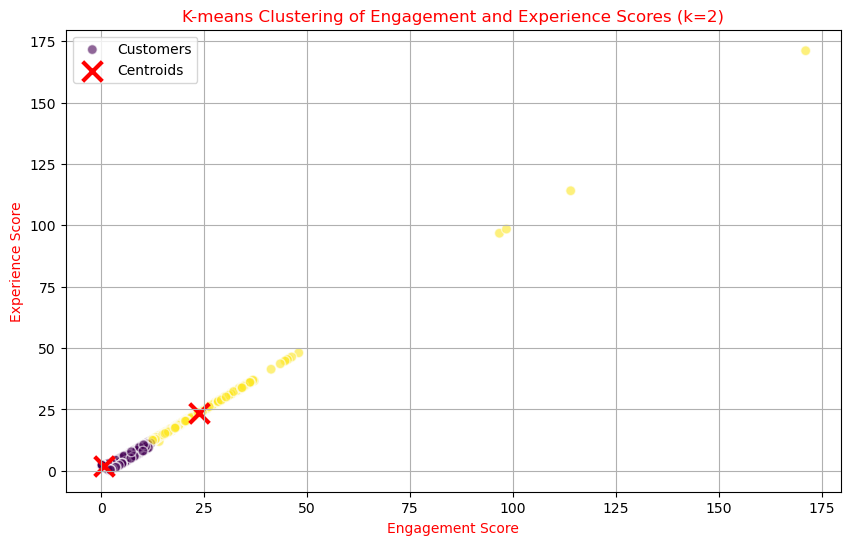

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(featured_data['Engagement Score'], featured_data['Experience Score'], c=featured_data['Score Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='w', label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering of Engagement and Experience Scores (k=2)', color='red')
plt.xlabel('Engagement Score', color='red')
plt.ylabel('Experience Score', color='red')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
print(pd.DataFrame(centroids, columns=['Engagement Score', 'Experience Score']))

   Engagement Score  Experience Score
0          0.689099          1.955940
1         23.704815         23.538893


# Aggregate the average satisfaction and experience score per cluster:

In [104]:
featured_data['Satisfaction Score'] = (featured_data['Engagement Score'] + featured_data['Experience Score']) / 2

In [106]:
cluster_aggregation = featured_data.groupby('Score Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

In [108]:
cluster_aggregation

,Score Cluster,Satisfaction Score,Experience Score
0,0,1.322519,1.955940
1,1,23.621854,23.538893


In [110]:
Mysql_Data=pd.DataFrame(featured_data,columns=['Bearer Id','Engagement Score', 'Experience Score','Satisfaction Score'])

In [112]:
Mysql_Data.sample(5)

,Bearer Id,Engagement Score,Experience Score,Satisfaction Score
92260,1.304240e+19,1.450185,0.731832,1.091008
94370,7.349880e+18,0.225819,2.319515,1.272667
107696,7.349880e+18,0.191598,2.316957,1.254278
106335,7.349880e+18,0.193815,2.319707,1.256761
41569,1.304240e+19,0.705103,1.462096,1.083599


In [114]:
Mysql_Data.isnull().sum()

Bearer Id             0
Engagement Score      0
Experience Score      0
Satisfaction Score    0
dtype: int64

# ◆ Connect with Mysql database:

In [117]:
from pandas.io import sql
import mysql.connector
import pymysql
import MySQLdb
from sqlalchemy import create_engine

ModuleNotFoundError: No module named 'mysql'

In [119]:
# Database credentials and connection
db_username = 'root'
db_password = '8686'
db_host = 'localhost'
db_port = 3306
db_name = 'telecom_project'

In [121]:
engine = create_engine(f"mysql+mysqlconnector://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}")

NameError: name 'create_engine' is not defined

In [123]:
Mysql_Data.to_sql(name='final_telecom_table', con=engine, if_exists='replace', index=False)

NameError: name 'engine' is not defined

In [125]:
query = "SELECT * FROM final_telecom_table LIMIT 10;"
data_from_db = pd.read_sql(query, con=engine)
print(data_from_db)

NameError: name 'engine' is not defined

In [127]:
Mysql_Data.to_csv('Final_telecom_Data.csv")

SyntaxError: unterminated string literal (detected at line 1) (587508315.py, line 1)